# Importacaion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar y explorar datos

In [2]:
df = pd.read_csv("usuarios_win_mac_lin.csv")
print(df.head())
print(df["clase"].value_counts())

#0 – Windows
#1 – Macintosh
#2 -Linux

   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2
clase
0    86
2    44
1    40
Name: count, dtype: int64


# Separar X e y

In [3]:
# X = variables de entrada (duración, páginas, acciones, valor)
# y = variable de salida (clase del sistema operativo: 0=Windows, 1=Mac, 2=Linux)
X = df[["duracion","paginas","acciones","valor"]]
y = df["clase"]  # 0=Windows, 1=Mac, 2=Linux

# Train/Test

In [4]:
# train_test_split separa los datos en dos conjuntos:
# - 80% para entrenar el modelo
# - 20% para probarlo
# stratify=y asegura que la proporción de clases se mantenga igual en ambos conjuntos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar el modelo

In [5]:
# Creamos un modelo de Regresión Logística multinomial
# solver="lbfgs" es el algoritmo de optimización
# max_iter=1000 indica el número máximo de iteraciones para asegurar convergencia

clf = LogisticRegression(solver="lbfgs", max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Predicción y métricas

In [6]:
y_pred = clf.predict(X_test) # el modelo predice las clases para los datos de prueba
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3)) # Accuracy: mide el porcentaje de aciertos totales
print("\nReporte por clase (Windows, Mac, Linux):")

# Classification Report: muestra precision, recall y f1-score por clase
print(classification_report(y_test, y_pred, target_names=["Windows","Mac","Linux"]))

Accuracy: 0.735

Reporte por clase (Windows, Mac, Linux):
              precision    recall  f1-score   support

     Windows       0.75      0.71      0.73        17
         Mac       1.00      0.50      0.67         8
       Linux       0.64      1.00      0.78         9

    accuracy                           0.74        34
   macro avg       0.80      0.74      0.73        34
weighted avg       0.78      0.74      0.73        34



# Visualizaciones

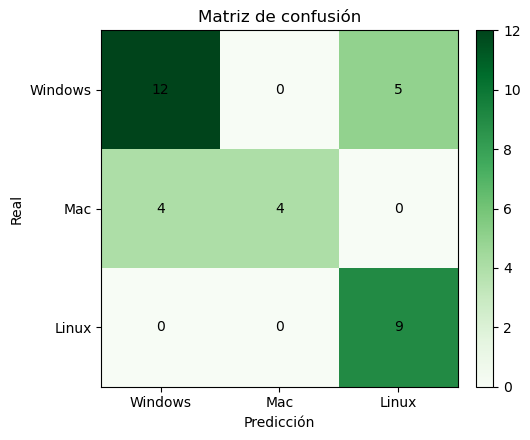

In [7]:
labels = ["Windows","Mac","Linux"]
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])

plt.figure(figsize=(5.5,4.5))
im = plt.imshow(cm, cmap="Greens")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

# Agregar los valores dentro de cada celda de la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar(im, fraction=0.046, pad=0.04)
# Ajusta los elementos para que no se superpongan
plt.tight_layout()
plt.show()

# Conclusión

En este ejercicio entrenamos un modelo de Regresión Logística Multinomial para clasificar usuarios de un sitio web en tres sistemas operativos (Windows, Mac y Linux) a partir de cuatro variables de comportamiento: **duración de la visita, páginas vistas, acciones realizadas y valor de las acciones.**

El modelo alcanzó una exactitud **(accuracy) cercana al 74%**, lo cual indica un desempeño aceptable pero no perfecto. Al analizar el **classification report y la matriz de confusión**, observamos que:

-**Windows y Linux** tuvieron buenos niveles de predicción.

**Macintosh fue la clase más difícil de identificar**, con varios casos confundidos como Windows.

Esto se debe, en parte, al desbalance de clases (menos ejemplos de Mac en el dataset).
En conclusión, el modelo logra un rendimiento razonable y permite experimentar cómo varían las predicciones al cambiar los valores de las variables de entrada.